In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Data set we'll be using
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Classification problem - What do our # classes represent?
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# our images contain matrix values from 0,255 because of RGB scale. make all these values between 0,1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Setting up the model using sequential layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0917 17:44:53.021548 4557755840 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# compile the model, ready for data fitting
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# fit the model and determine the params we want
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4993 - acc: 0.8250
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3767 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3371 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3148 - acc: 0.8831
Epoch 5/5
10000/10000 [==============================] - 0s 47us/sample - loss: 0.3597 - acc: 0.8705


In [8]:
# use the model to create predictions
predictions = model.predict(test_images)

In [9]:
##Plotting functions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

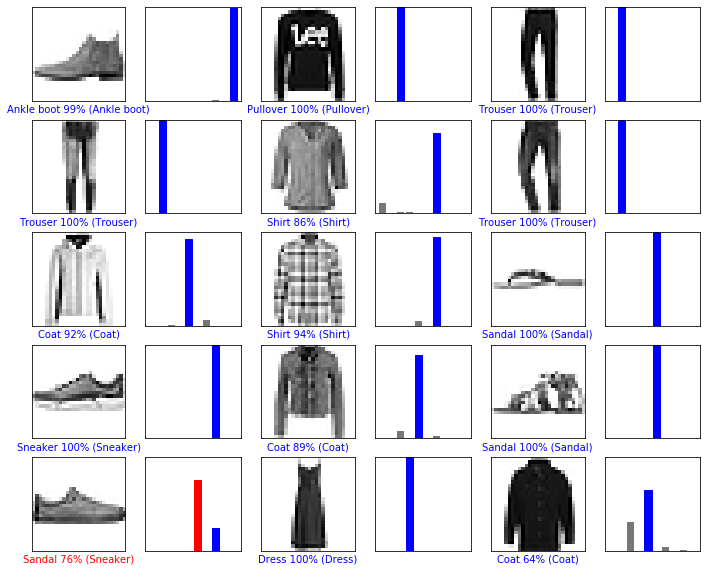

In [10]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [11]:
# Predict Single Value
img = test_images[0]
img = (np.expand_dims(img,0))

predictions_single = model.predict(img)

print(predictions_single)

[[1.0618771e-07 7.7180333e-09 2.5121352e-08 3.6270731e-07 1.5270505e-08
  7.4973272e-04 1.0352844e-07 1.0053887e-02 8.3764962e-07 9.8919487e-01]]
